In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns     #seaborn画出的图更好看，且代码更简单，缺点是可塑性差
from statsmodels.graphics.tsaplots import plot_acf  #自相关图
from statsmodels.tsa.stattools import adfuller as ADF  #平稳性检测
from statsmodels.graphics.tsaplots import plot_pacf    #偏自相关图
from statsmodels.stats.diagnostic import acorr_ljungbox    #白噪声检验
from statsmodels.tsa.arima_model import ARIMA

In [45]:
df = pd.read_csv('pv_test.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S')

In [46]:
df

,Datetime,electricity
0,2001-09-09 04:00:00,0.000
1,2001-09-09 05:00:00,0.000
2,2001-09-09 06:00:00,0.054
3,2001-09-09 07:00:00,0.264
4,2001-09-09 08:00:00,0.448
...,...,...
52577,2006-12-31 19:00:00,0.000
52578,2006-12-31 20:00:00,0.000
52579,2006-12-31 21:00:00,0.000
52580,2006-12-31 22:00:00,0.000


In [47]:
daydf = df.groupby(pd.Grouper(key='Datetime', freq='1M')).sum()

<AxesSubplot:xlabel='Datetime'>

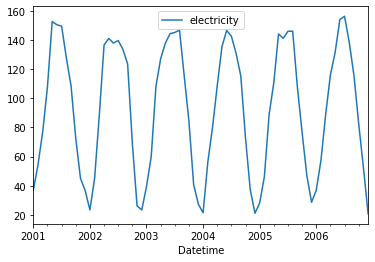

In [48]:
daydf.plot()

In [49]:
df = df.set_index('Datetime', drop=True)

<ipython-input-50-dde1d9dd8a05>:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(df).show()


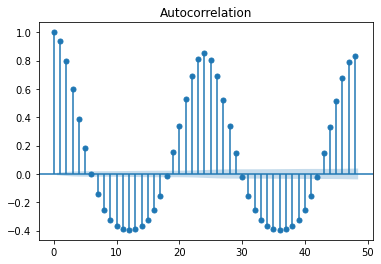

In [50]:
plot_acf(df).show()

In [51]:
print('原始序列的ADF检验结果为：', ADF(daydf['electricity']))

原始序列的ADF检验结果为： (-2.1742980341076525, 0.21570566063259394, 10, 61, {'1%': -3.542412746661615, '5%': -2.910236235808284, '10%': -2.5927445767266866}, 433.37405082138343)


In [39]:
ADF(daydf['electricity'])

(-2.1742980341076525,
 0.21570566063259394,
 10,
 61,
 {'1%': -3.542412746661615,
  '5%': -2.910236235808284,
  '10%': -2.5927445767266866},
 433.37405082138343)

<AxesSubplot:xlabel='Datetime'>

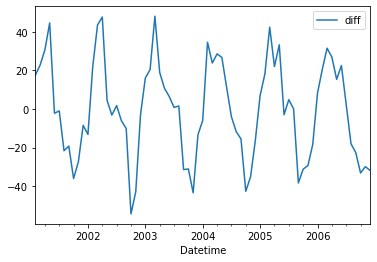

In [52]:
D_data = daydf.diff().dropna()   #1阶差分，丢弃na值
D_data.columns = ['diff']  #更改列名
D_data.plot() #时序图

<ipython-input-53-a94001af0a3b>:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_acf(D_data).show()


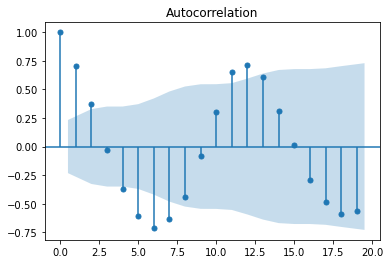

In [53]:
plot_acf(D_data).show()

In [54]:
print(u'差分序列的ADF检验结果为：', ADF(D_data['diff'])) #平稳性检测

差分序列的ADF检验结果为： (-6.240896147979845, 4.7002078637611355e-08, 11, 59, {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}, 428.71327300779546)


In [63]:
#相对最优模型
daydf['electricity'] = daydf['electricity'].astype(float)  #销量转为float类型
#定阶
pmax = int(len(daydf)/10) #一般阶数不超过length/10
qmax = int(len(daydf)/10) #一般阶数不超过length/10
bic_matrix = [] #bic矩阵
for p in range(pmax+1):
    tmp = []
    for q in range(qmax+1):
        try: #存在部分报错，所以用try来跳过报错。
            tmp.append(ARIMA(daydf, (p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)

bic_matrix = pd.DataFrame(bic_matrix) #从中可以找出最小值

p,q = bic_matrix.stack().idxmin() #先用stack展平，然后用idxmin找出最小值位置。
print(u'BIC最小的p值和q值为：%s、%s' %(p,q))


D:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessi

BIC最小的p值和q值为：5、3


D:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated i

NameError: name 'data' is not defined

In [66]:
model = ARIMA(daydf, (p,1,q)).fit()
model.summary2() #给出一份模型报告

D:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated i

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 576.4793  
Dependent Variable: D.electricity    Log-Likelihood:      -266.93   
Date:               2021-10-29 15:00 Scale:               1.0000    
No. Observations:   71               Method:              css-mle   
Df Model:           9                Sample:              02-28-2001
Df Residuals:       62                                    12-31-2006
Converged:          1.0000           S.D. of innovations: 9.634     
No. Iterations:     190.0000         HQIC:                562.850   
AIC:                553.8525                                        
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const                -0.0258   0.3577 -0.0720 0.9426 -0.7267  0.6752
ar.L1.D.electricity   0.6643   0.1324  5.0182 0.0000  0.4048  0.9237
ar.L2.D.electricity   0.5452   0.1491  3.6562 0.0003  0.2529  0.8374
ar.L3.D.electricity  -0.6945   0.1523 -4.5607 0.0000 -0.9930 -0.3960
ar.L4.D.electricity  -0.0398   0.1511 -0.2632 0.7924 -0.3360  0.2564
ar.L5.D.electricity  -0.1450   0.1338 -1.0840 0.2784 -0.4073  0.1172
ma.L1.D.electricity  -0.8306   0.3333 -2.4922 0.0127 -1.4838 -0.1774
ma.L2.D.electricity  -0.8955   0.6006 -1.4911 0.1359 -2.0726  0.2816
ma.L3.D.electricity   0.9293   0.3147  2.9529 0.0031  0.3125  1.5461
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            0.8684            -0.5022           1.0031            -0.0834
AR.2            0.8684             0.5022           1.0031             0.0834
AR.3           -1.0926            -0.0000           1.0926            -0.5000
AR.4           -0.4592            -2.4618           2.5042            -0.2793
AR.5           -0.4592             2.4618           2.5042             0.2793
MA.1           -1.0015            -0.0000           1.0015            -0.5000
MA.2            0.9826            -0.3301           1.0365            -0.0516
MA.3            0.9826             0.3301           1.0365             0.0516
====================================================================

"""

In [67]:
model.forecast(12)

(array([ 22.18771581,  47.08758836,  77.17346425, 115.32193054,
        144.31484604, 162.26255815, 158.67138453, 140.03669008,
        106.53203381,  71.67440159,  40.71763548,  25.66416586]),
 array([ 9.63428416, 12.5431038 , 13.04738371, 13.204641  , 13.22293794,
        13.32036452, 13.50220311, 13.51163796, 13.57102518, 14.21308239,
        15.47727689, 17.32703596]),
 array([[  3.30486583,  41.07056579],
        [ 22.50355666,  71.67162005],
        [ 51.60106208, 102.74586642],
        [ 89.44130975, 141.20255133],
        [118.39836391, 170.23132816],
        [136.15512343, 188.36999288],
        [132.20755273, 185.13521633],
        [113.55436631, 166.51901385],
        [ 79.93331322, 133.1307544 ],
        [ 43.81727199,  99.53153118],
        [ 10.38273019,  71.05254077],
        [ -8.29620057,  59.6245323 ]]))